In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>ACCESO A BANDA ANCHA</b>

<p>PENETRACIÓN DE INTERNET - ACCESO POR CADA 100 HOGARES</p>
<p>En este dataset podemos ver el acceso a banda ancha por cada 100 hogares por cada provincia. Está dividido por año y trimestre.</p>
<p>Se graficará su evolución en el tiempo.</p>

In [59]:
p_internet = pd.read_csv('datasets/internet-penetracion.csv')
pd.DataFrame(p_internet)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


In [60]:
p_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB



<p>Debido a que hay columnas vacías e innecesarias, voy a eliminarlas.</p>
<p>Los datos proporcionados para el año y el trimestre son enteros</p>


In [61]:
p_internet.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], inplace=True)

In [54]:
p_internet['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

Modifico el tipo de dato de la columna 'Acceso por cada 100 hogares' para que se pueda analizar luego.

In [62]:
p_internet['Accesos por cada 100 hogares'] = p_internet['Accesos por cada 100 hogares'].str.replace(',', '.')
p_internet['Accesos por cada 100 hogares'] = p_internet['Accesos por cada 100 hogares'].astype('float')

In [63]:
p_internet.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


<p>Los nombres de las provincias están bien escritos y no detecto datos fuera de rango en este dataset.</p>


In [90]:
total_acc = p_internet.groupby('Año')['Accesos por cada 100 hogares'].sum()

Año
2014    3541.64
2015    3763.04
2016    3829.42
2017    4082.47
2018    4653.84
2019    5152.00
2020    5388.54
2021    5949.93
2022    6511.06
Name: Accesos por cada 100 hogares, dtype: float64

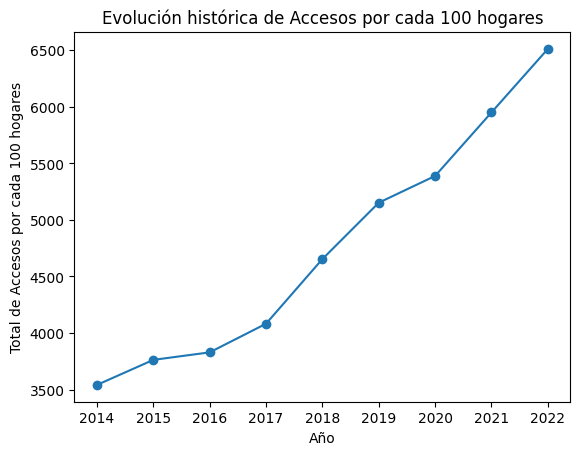

In [94]:
total_acc.plot(marker = 'o')
plt.title('Evolución histórica de Accesos por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Total de Accesos por cada 100 hogares')
plt.show()


Este gráfico nos indica la evolución del acceso a internet en los hogares a nivel nacional. Entre 2014 y 2022, incrementó un 83%.

In [65]:
p_internet.to_csv('01-internet-acceso.csv', sep=',', encoding='utf-8', index=False)

<p>ACCESO A BANDA ANCHA Y ANGOSTA POR PROVINCIA</p>
<p>Este dataset nos indica los accesos a Banda Ancha y Dial Up por provincia, divididos por año y trimestre.</p>

In [3]:
data_baprov = pd.read_csv('datasets/banda-ancha-por-provincia.csv')
pd.DataFrame(data_baprov)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28


In [3]:
data_baprov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [25]:
data_baprov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [24]:
data_baprov.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


No detecto valores fuera de lugar en lo que respecta al año y al trimestre. Los nombres de las provincias están bien escritos.

<p>ACCESO A BANDA ANCHA POR TRIMESTRE</p>
<p>Este dataset nos muestra el numero de accesos por Banda Ancha y Dial Up a nivel nacional, dividido por año y trimestre. </p>

In [11]:
ba_trim = pd.read_csv('datasets/banda-ancha-trimestral.csv')
pd.DataFrame(ba_trim)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021
5,2021,3,10,10,10,Jul-Sept 2021
6,2021,2,10,10,10,Abr-Jun 2021
7,2021,1,10,10,10,Ene-Mar 2021
8,2020,4,10,10,10,Oct-Dic 2020
9,2020,3,9,10,9,Jul-Sept 2020


In [11]:
ba_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [12]:
total_banda_ = ba_trim.groupby('Año')['Banda ancha fija'].sum()
total_dial_ = ba_trim.groupby('Año')['Dial up'].sum()

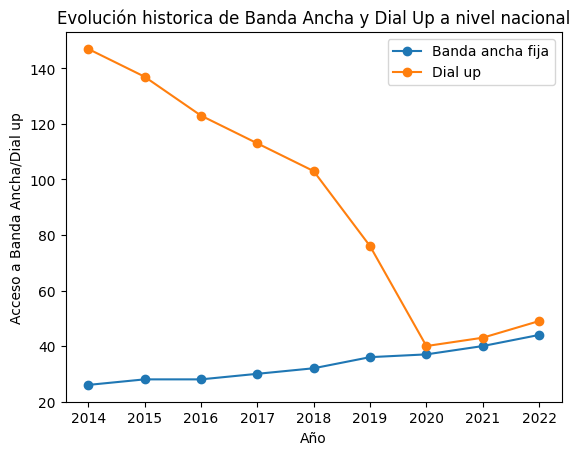

In [13]:
y1 = total_banda_
y2 = total_dial_

plt.plot(y1, label='Banda ancha fija', marker='o')  
plt.plot(y2, label='Dial up', marker='o')  


plt.xlabel('Año')
plt.ylabel('Acceso a Banda Ancha/Dial up')
plt.title('Evolución historica de Banda Ancha y Dial Up a nivel nacional')
plt.legend()

plt.show()

<b>TECNOLOGIAS</b>

In [14]:
tec_prov = pd.read_csv('datasets/tecnologia-provincia.csv')
pd.DataFrame(tec_prov)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0
863,2014,1,Tucumán,130.0,83.0,121.0,13.0,98.0,130.0


Verifico valores únicos en los años para corregir aquellos con *.

In [15]:
tec_prov['Año'].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

In [16]:
tec_prov['Trimestre'].unique()

array(['4', '3', '2', '1', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [17]:
tec_prov['Año'] = tec_prov['Año'].str.replace('*', '')

In [18]:
tec_prov['Trimestre'] = tec_prov['Trimestre'].str.replace('*', '')

Eliminé datos nulos para poder eliminar la última fila.

In [19]:
tec_prov.dropna(inplace=True)

In [20]:
tec_prov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           864 non-null    object 
 1   Trimestre     864 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.5+ KB


In [21]:
tec_prov.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


Podemos ver que la tecnología más utilizada a nivel nacional es la Fibra Óptica, especialmente entre las provincias Tierra del Fuego, Río Negro, Chubut, Buenos Aires. En segundo puesto, Cablemodem en Capital Federal, Córdoba, Santa Fe. 

In [56]:
columnas = ['ADSL','Cablemodem','Fibra óptica','Wireless','Otros']
total_prov = tec_prov.groupby('Provincia')[columnas].sum()
total_prov

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
Provincia,,,,,
Buenos Aires,7034.0,66.0,10011.0,2279.0,1382.0
Capital Federal,11879.0,16033.0,1518.0,133.0,661.0
Catamarca,848.0,3633.0,661.0,2102.0,552.0
Chaco,1752.0,1519.0,4635.0,1368.0,668.0
Chubut,1676.0,11057.0,13694.0,621.0,312.0
Corrientes,1859.0,1559.0,6168.0,104.0,977.0
Córdoba,10864.0,12693.0,6099.0,958.0,5048.0
Entre Ríos,3480.0,2968.0,2246.0,497.0,2772.0
Formosa,752.0,329.0,3273.0,2610.0,4230.0


In [57]:
total_prov.sum(axis=0)

ADSL             74618.0
Cablemodem       89244.0
Fibra óptica    142934.0
Wireless         49920.0
Otros            88744.0
dtype: float64

In [23]:
tec2019 = tec_prov.groupby('Año')[['Fibra óptica', 'Cablemodem']].sum()
tec2019

,Fibra óptica,Cablemodem
Año,,
2014,23161.0,15942.0
2015,20887.0,12962.0
2016,21509.0,13277.0
2017,18578.0,10975.0
2018,20978.0,7073.0
2019,2867.0,1603.0
2019,12884.0,4458.0
2020,6371.0,6795.0
2021,8242.0,7915.0


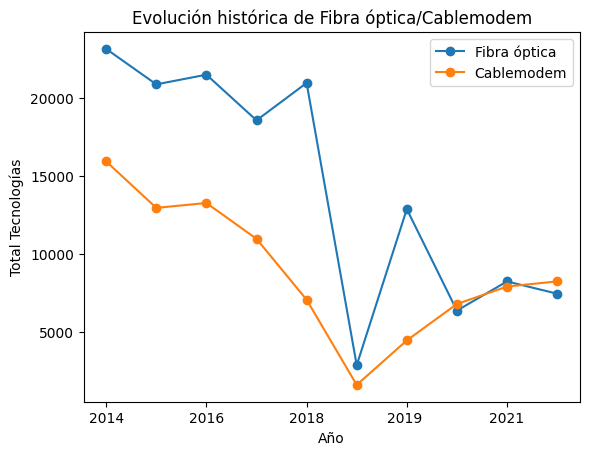

In [24]:
tec2019.plot(marker = 'o')
plt.title('Evolución histórica de Fibra óptica/Cablemodem')
plt.xlabel('Año')
plt.ylabel('Total Tecnologías')
plt.legend()

plt.show()

<p>Por la caída entre los años 2018 y 2019, podemos pensar que hubo poca cantidad de instalaciones, o bien, como los datos de 2019 fueron modificados, quizás no fueron tomados en cuenta. </p>
<p>Pero también podemos ver, que para fines de 2021, el uso de ambas tecnologías, llegó a valores similares. </p>

<p>TECNOLOGIAS POR LOCALIDAD</p>
<p>Este dataset nos muestra las tecnologías utilizadas por Localidad.</p>

In [96]:
tec_loc = pd.read_csv('datasets/tecnologia-localidad.csv')
pd.DataFrame(tec_loc)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,- 0,31,- 0,"3,73",- 0,- 0,- 0,- 0,"3,76",NaN
3133,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,313,313,NaN
3134,TUCUMAN,Trancas,Villa de Trancas,90112030,126,- 0,- 0,- 0,33,- 0,- 0,101,260,NaN
3135,TUCUMAN,Yerba Buena,Villa Carmela,90119020,"1,5",- 0,- 0,- 0,1,- 0,- 0,97,"1,6",NaN


In [97]:
tec_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   3137 non-null   object 
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.2+ KB


Elimino columna vacía y corrijo los tipos de datos para su analisis posterior.

In [98]:
tec_loc.drop(columns=['Unnamed: 13'], inplace=True)

In [111]:
columnas = ['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS','Total general']
tec_loc[columnas] = tec_loc[columnas].replace('- 0', '0')
tec_loc[columnas] = tec_loc[columnas].replace(',', '.', regex=True).astype(float)
tec_loc[columnas]

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,874.0,4.54,0.0,3.00,0.0,852.0,0.0,706.0,6.98
1,181.0,0.00,0.0,0.00,10.0,1.0,0.0,0.0,192.00
2,0.0,0.00,0.0,0.00,0.0,0.0,0.0,181.0,181.00
3,0.0,782.00,0.0,6.00,167.0,0.0,0.0,327.0,1.28
4,0.0,0.00,0.0,0.00,0.0,0.0,0.0,6.0,6.00
...,...,...,...,...,...,...,...,...,...
3132,0.0,31.00,0.0,3.73,0.0,0.0,0.0,0.0,3.76
3133,0.0,0.00,0.0,0.00,0.0,0.0,0.0,313.0,313.00
3134,126.0,0.00,0.0,0.00,33.0,0.0,0.0,101.0,260.00
3135,1.5,0.00,0.0,0.00,1.0,0.0,0.0,97.0,1.60


In [112]:
tec_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   float64
 5   CABLEMODEM     3137 non-null   float64
 6   DIAL UP        3137 non-null   float64
 7   FIBRA OPTICA   3137 non-null   float64
 8   OTROS          3137 non-null   float64
 9   SATELITAL      3137 non-null   float64
 10  WIMAX          3137 non-null   float64
 11  WIRELESS       3137 non-null   float64
 12  Total general  3137 non-null   float64
dtypes: float64(9), object(4)
memory usage: 318.7+ KB


In [113]:
tec_loc.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,73.777160,38.037274,3.284396,57.125056,16.123752,1.108065,0.691106,89.483121,128.054303
std,185.303675,142.005453,23.237420,162.236972,74.033343,15.515385,14.933928,164.796438,206.753430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,28.350000
75%,6.080000,1.130000,0.000000,7.000000,0.000000,1.000000,0.000000,96.000000,156.000000
max,992.000000,985.000000,537.000000,976.000000,970.000000,852.000000,444.000000,999.000000,992.000000


<p>CONECTIVIDAD POR LOCALIDAD</p>
<p>Este dataset nos indica con qué tecnologias cuenta cada localidad, indicando también el partido y provincia correspondiente.</p>

In [2]:
conectividad_loc = pd.read_csv('datasets/conectividad-localidad.csv')
pd.DataFrame(conectividad_loc)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,SI,SI,SI,SI,SI,SI,SI,SI,SI
4307,BUENOS AIRES,Pilar,Presidente Derqui,SI,SI,--,SI,SI,SI,SI,SI,--
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,--,--,--,--,SI,SI,--,--,--
4309,BUENOS AIRES,Pilar,Santa Teresa,--,--,--,--,SI,SI,--,--,SI


In [116]:
conectividad_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


In [117]:
conectividad_loc.describe()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
count,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,84,12,3182,3448,3908,2784,2574,2431,2243,2224,3248


A diferencia del dataset anterior, contamos con datos de más localidades. 
<p>Podemos observar que solo hay dos datos para diferenciar si se dispone esa tecnología (SI, --), y que se destaca Dial Up, ADSL, Cablemódem y la telefonia fija.</p>
<p>También podemos ver, a diferencia de los otros datasets, qué sucede con las redes móviles 3G y 4G. Según el describe anterior, abarca un poco más de la mitad de los datos. Es decir que, puede que haya varias localidades sin acceso a esta conectividad.</p>

In [10]:
red4g = conectividad_loc[conectividad_loc['4G'] == '--']
red4g = conectividad_loc.groupby(['Provincia', 'Partido'])['4G'].count()
red4g.sort_values(ascending=False).head(10)

Provincia     Partido     
RIO NEGRO     General Roca    70
CORDOBA       Santa María     48
              San Justo       45
SANTA FE      Castellanos     44
CORDOBA       Colón           43
SAN LUIS      Ayacucho        40
CORDOBA       Calamuchita     39
ENTRE RIOS    Paraná          37
BUENOS AIRES  La Plata        36
CORDOBA       Punilla         33
Name: 4G, dtype: int64

In [15]:
no_fibra = conectividad_loc[conectividad_loc['Fibra óptica'] == '--']
no_fibra = conectividad_loc.groupby(['Provincia', 'Partido'])['Fibra óptica'].count()
no_fibra.sort_values(ascending=False).head(10)

Provincia     Partido     
RIO NEGRO     General Roca    70
CORDOBA       Santa María     48
              San Justo       45
SANTA FE      Castellanos     44
CORDOBA       Colón           43
SAN LUIS      Ayacucho        40
CORDOBA       Calamuchita     39
ENTRE RIOS    Paraná          37
BUENOS AIRES  La Plata        36
CORDOBA       Punilla         33
Name: Fibra óptica, dtype: int64

<p>Basandome en la conclusión anterior, en estos partidos se podría proponer la instalación de antenas proveedoras de redes móviles, o bien, que se instalen puntos con conexión inalámbrica a internet con fibra óptica. (WiFiZone)</p>

<p>El Internet de fibra óptica puede alcanzar hasta 2,000 Mbps, mientras que Internet por cable solo puede alcanzar 300 Mbps. La fibra óptica también ofrece velocidades de carga significativamente más rápidas que el Internet por cable.[...] Actualmente, la fibra óptica no está tan ampliamente disponible como el Internet por cable debido a que su desplazamiento es muy costoso.</p>
<p>Fuente: https://win.pe/blog/diferencias-fibra-optica-y-cable-coaxial/</p>
<p>Si bien, nuestra fuente es de Perú, podemos explicar porqué aún se destacan las tecnologías ADSL o Cablemódem.</p>

<b>VELOCIDAD</b>

<p>MBPS POR PROVINCIA</p>
<p>Este dataset nos indica la velocidad media de bajada por provincia, dividido por año y trimestre.</p>

In [12]:
mbps_prov = pd.read_csv('datasets/mbps-provincia.csv')
pd.DataFrame(mbps_prov)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
...,...,...,...,...
859,2014,1,Santa Cruz,332.000
860,2014,1,Santa Fe,315.000
861,2014,1,Santiago Del Estero,295.000
862,2014,1,Tierra Del Fuego,345.000


In [74]:
mbps_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [75]:
mbps_prov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [13]:
mbps_prov.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,302.410067
std,2.583484,1.118682,287.314571
min,2014.000000,1.000000,1.000000
25%,2016.000000,1.750000,2.808500
50%,2018.000000,2.500000,344.000000
75%,2020.000000,3.250000,520.250000
max,2022.000000,4.000000,988.000000


Los nombres de las provincias están bien escritos y no detecto datos fuera de rango en este dataset. 

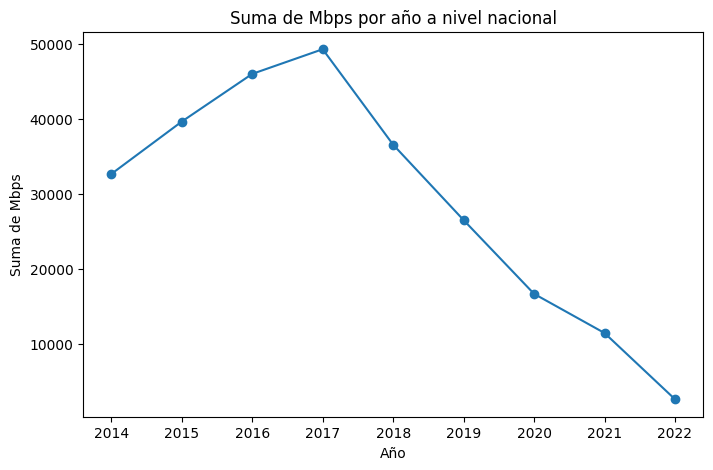

In [27]:
df_suma = mbps_prov.groupby('Año')['Mbps (Media de bajada)'].sum().reset_index()

plt.figure(figsize=(8, 5))

plt.plot(df_suma['Año'],df_suma['Mbps (Media de bajada)'],  marker='o', label='Suma de Mbps por año')

plt.xlabel('Año')
plt.ylabel('Suma de Mbps')
plt.title('Suma de Mbps por año a nivel nacional')

plt.show()


<p>RANGOS DE VELOCIDAD POR PROVINCIA</p>
<p>Este dataset el acceso a internet por provincia, dividido por rangos de velocidad.</p>

In [25]:
rangos_prov = pd.read_csv('datasets/rangos-velocidad-prov.csv')
pd.DataFrame(rangos_prov)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759
...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,161.000,1.625,24.972,1.000,1.000,0.000,0,0.000,26.760
860,2014,1,Santa Fe,8.456,124.468,345.225,20.328,6.845,23.000,668,0.000,506.013
861,2014,1,Santiago Del Estero,1.234,10.531,22.817,2.422,109.000,0.000,0,0.000,37.113
862,2014,1,Tierra Del Fuego,12.000,607.000,30.902,6.000,0.000,0.000,0,0.000,31.527


In [46]:
rangos_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 81.1+ KB


<p>Cambio el tipo de dato de la columna '+ 30 Mbps' para que pueda ser analizada con el describe. Dejando fuera los valores que podrian ser millones, ya que, en nuestro dataset la mayoria de los valores están dentro de los miles y decenas de miles. Voy a considerar solo estos valores, ya que,  esta columna tiene relevancia.</p>
<p>"Una buena velocidad de descarga es de al menos 100 Mbps y una buena velocidad de carga es de al menos 10 Mbps." Fuente: https://www.highspeedinternet.com/es/que-velocidad-necesito</p>

In [26]:
rangos_prov['+ 30 Mbps'] = pd.to_numeric(rangos_prov['+ 30 Mbps'], errors='coerce')
rangos_prov = rangos_prov.dropna(subset=['+ 30 Mbps'])

In [27]:
rangos_prov['+ 30 Mbps']

2       52.739
3       94.866
4       19.048
5      686.330
6       85.806
        ...   
859      0.000
860    668.000
861      0.000
862      0.000
863      0.000
Name: + 30 Mbps, Length: 841, dtype: float64

In [34]:
rangos_prov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [28]:
rangos_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,835.000000
mean,2017.919144,2.495838,124.533164,104.513419,67.452678,76.389083,98.444064,91.878955,33.915307
std,2.566381,1.118159,185.810610,212.819198,138.350286,169.560334,209.046718,190.948198,134.703558
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.000000,10.000000,3.261000,5.325000,4.857000,2.010000,2.000000,0.000000
50%,2018.000000,2.000000,51.000000,8.475000,19.116000,14.153000,10.059000,13.000000,0.000000
75%,2020.000000,3.000000,130.000000,86.281000,56.161000,42.433000,59.000000,74.377000,7.100500
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,985.767000,989.000000


Los nombres de las provincias están bien escritos. 
<p>Con lo que respecta al año y al trimestre, no hay datos fuera de rango.
Se puede observar que la mínima de "Otros" no es 0, sino un valor negativo.</p>

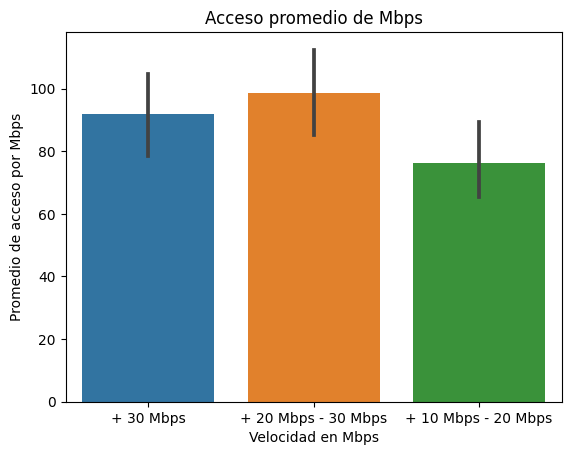

In [49]:
sns.barplot(rangos_prov[['+ 30 Mbps', '+ 20 Mbps - 30 Mbps', '+ 10 Mbps - 20 Mbps']])
plt.xlabel('Velocidad en Mbps')
plt.ylabel('Promedio de acceso por Mbps')
plt.title('Acceso promedio de Mbps')

plt.show()

En el gráfico podemos ver acceso promedio de las velocidades más altas de nuestro dataset a nivel histórico. 

<p>VELOCIDAD POR PROVINCIA</p>
<p>En este dataset, podemos ver el numero de accesos a internet por velocidad de bajada en cada provincia.</p>

In [2]:
vel_prov = pd.read_csv('datasets/velocidad-provincia.csv')
pd.DataFrame(vel_prov)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,...,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0
1,2022.0,4.0,Capital Federal,106.772,31,- 0,- 0,451.000,34,1.307,...,- 0,- 0,- 0,1,- 0,- 0,15,- 0,28.406,- 0
2,2022.0,4.0,Catamarca,2.280,- 0,- 0,- 0,34.000,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,4.0,Chaco,3.909,- 0,225,111,234.000,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,4.0,Chubut,20.026,8,- 0,- 0,69.000,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2017.0,4.0,Santa Fe,14.119,- 0,- 0,- 0,3.109,- 0,7.637,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
501,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41.000,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
502,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6.000,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
503,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105.000,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [3]:
vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    505 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    o

In [4]:
vel_prov['64 Mbps'].unique()

array(['- 0', '4', '0', '8', '1', nan], dtype=object)

In [5]:
vel_prov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán',
       nan], dtype=object)

In [6]:
vel_prov['Año'].unique()

array([2022., 2021., 2020., 2019., 2018., 2017.,   nan])

In [9]:
vel_prov['Trimestre'].unique()

array([ 4.,  3.,  2.,  1., nan])

In [85]:
vel_prov.describe()

,Año,Trimestre,"0,5 Mbps",3 Mbps,10 Mbps
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,2019.857143,2.571429,135.160514,536.427409,1830.656857
std,1.522341,1.138019,1281.313402,3423.594162,13716.783075
min,2017.000000,1.000000,1.009000,1.029000,1.000000
25%,2019.000000,2.000000,19.000000,5.910000,7.161500
50%,2020.000000,3.000000,39.000000,9.833000,20.563500
75%,2021.000000,4.000000,69.000000,27.000000,92.386750
max,2022.000000,4.000000,28724.000000,53034.000000,204191.000000


A diferencia de los otros datasets, este contiene datos desde 2017 hasta 2022. Puede que haya errores en los años y trimestres. Puede que haya columnas innecesarias, ya que, contienen pocos datos relevantes para el analisis. 

<p>VELOCIDAD POR LOCALIDAD</p>
<p>Este dataset nos indica la cantidad de accesos por velocidad en cada localidad.</p>

In [72]:
vel_loc = pd.read_csv('datasets/velocidad-localidad.csv')
pd.DataFrame(vel_loc)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3091,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,TUCUMAN,Trancas,Villa de Trancas,90112030,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
vel_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3095 non-null   object 
 1   Partido     3095 non-null   object 
 2   Localidad   3095 non-null   object 
 3   Link Indec  3095 non-null   object 
 4   Otros       962 non-null    float64
 5   0,256 Mbps  28 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    643 non-null    float64
 8   0,512 Mbps  523 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   284 non-null    float64
 11  1 Mbps      891 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    15 non-null     float64
 14  2 Mbps      722 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    4 non-null      float64
 17  3 Mbps      1351 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    373 non-null   

<p>A simple vista, desde el info, podemos ver que hay muchas columnas con datos nulos. </p>
<p>De este dataset, nos pueden interesar aquellas columnas mayores a 30 Mbps, ya que, por lo investigado anteriormente, no garantizarian al usuario una buena velocidad.</p>

In [94]:
vel_loc['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [111]:
vel_loc['Localidad'].value_counts()

Localidad
OTROS                       74
San Pedro                    8
San José                     6
San Antonio                  6
San Miguel                   6
                            ..
Olaeta                       1
Santa Eufemia                1
Ucacha                       1
Villa Reducción              1
Yerba Buena - Marcos Paz     1
Name: count, Length: 2801, dtype: int64

Podemos ver que hay menos localidades en este dataset y que los nombres de las provincias están escritos de otra forma (en mayúsculas, no llevan tildes y en vez de decir Capital Federal, dice CABA). 

In [93]:
vel_loc.describe()

,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",1 Mbps,"1,25 Mbps","1,5 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
count,962.000000,28.000000,1.0,643.000000,523.000000,1.0,284.000000,891.000000,1.0,15.000000,...,3.000000,1.0,1.0,2.000000,1.0,17.000000,231.000000,1.0,31.000000,1.0
mean,50.369203,3.464286,225.0,4.141316,2.214149,111.0,34.990518,54.715587,25.0,54.611333,...,26.000000,1.0,4.0,7.000000,1.0,65.386588,235.630571,2.0,109.028774,1.0
std,124.276225,6.511995,NaN,20.820317,5.000386,NaN,91.461942,113.513534,NaN,51.538753,...,6.244998,NaN,NaN,8.485281,NaN,140.742674,233.348746,NaN,238.166693,NaN
min,-4.000000,1.000000,225.0,0.000000,1.000000,111.0,1.000000,0.000000,25.0,1.170000,...,19.000000,1.0,4.0,1.000000,1.0,1.000000,1.000000,2.0,1.000000,1.0
25%,1.000000,1.000000,225.0,1.000000,1.000000,111.0,3.000000,2.031500,25.0,20.500000,...,23.500000,1.0,4.0,4.000000,1.0,2.000000,43.500000,2.0,2.807500,1.0
50%,4.000000,1.000000,225.0,1.000000,1.000000,111.0,9.000000,11.000000,25.0,42.000000,...,28.000000,1.0,4.0,7.000000,1.0,12.000000,173.000000,2.0,13.000000,1.0
75%,30.000000,3.000000,225.0,2.500000,1.000000,111.0,27.250000,47.000000,25.0,62.000000,...,29.500000,1.0,4.0,10.000000,1.0,91.000000,346.500000,2.0,88.500000,1.0
max,950.000000,31.000000,225.0,451.000000,61.000000,111.0,908.000000,994.000000,25.0,192.000000,...,31.000000,1.0,4.0,13.000000,1.0,582.000000,998.000000,2.0,952.000000,1.0


<p>Tal vez encontremos que en varias localidades se sigan utilizando velocidades más bajas. Esto puede ser por el uso de la conexión por Dial Up y la instalación posterior de conexión por Banda Ancha. </p>
<p>"La máxima velocidad posible 56 Kbps, siendo posible cargar pocos elementos de las páginas web como texto, imágenes o en contados casos vídeos. A principios de la década del 2010, este tipo de conexiones empezó a caer en desuso debido al crecimiento de las conexiones por fibra óptica y el mayor esparcimiento y distribución hogareña de la Banda Ancha." Fuente: Wikipedia.</p>

In [88]:
print('1 Mbps:', vel_loc['1 Mbps'].sum())
print('5 Mbps:', vel_loc['5 Mbps'].sum())
print('20 Mbps:', vel_loc['20 Mbps'].sum())
print('30 Mbps:', vel_loc['30 Mbps'].sum())
print('50 Mbps:', vel_loc['50 Mbps'].sum())
print('60 Mbps:', vel_loc['60 Mbps'].sum())
print('80 Mbps:', vel_loc['80 Mbps'].sum())

1 Mbps: 48751.588
5 Mbps: 75529.484
20 Mbps: 85242.042
30 Mbps: 44510.244
50 Mbps: 85922.044
60 Mbps: 44385.282
80 Mbps: 3379.892


<b>KPI's</b>

In [73]:
acceso_int = pd.read_csv('datasets/01-internet-acceso.csv')
pd.DataFrame(acceso_int)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
859,2014,1,Santa Cruz,28.94
860,2014,1,Santa Fe,47.85
861,2014,1,Santiago Del Estero,16.31
862,2014,1,Tierra Del Fuego,63.97


In [74]:
objetivo_aumento = 2

acceso_int['Nuevo acceso'] = acceso_int['Accesos por cada 100 hogares'] * (1 + objetivo_aumento / 100)

In [75]:
acceso_int['KPI'] = ((acceso_int['Nuevo acceso'] - acceso_int['Accesos por cada 100 hogares']) / acceso_int['Accesos por cada 100 hogares']) * 100

In [77]:
acceso_int.head(30)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Nuevo acceso,KPI
0,2022,4,Buenos Aires,78.94,80.5188,2.0
1,2022,4,Capital Federal,122.73,125.1846,2.0
2,2022,4,Catamarca,65.77,67.0854,2.0
3,2022,4,Chaco,43.62,44.4924,2.0
4,2022,4,Chubut,85.57,87.2814,2.0
5,2022,4,Córdoba,89.03,90.8106,2.0
6,2022,4,Corrientes,51.64,52.6728,2.0
7,2022,4,Entre Ríos,64.01,65.2902,2.0
8,2022,4,Formosa,39.41,40.1982,2.0
9,2022,4,Jujuy,58.46,59.6292,2.0


<p>Realicé la formula del primer KPI para ver cómo quedarian los resultados de Nuevo acceso. En este caso, se realiza una proyección de incremento al acceso a internet del 2% por cada 100 hogares, por provincia. </p>

<b>DENUNCIAS Y RECLAMOS</b>

<p>Este dataset nos muestra la cantidad de reclamos y/o denuncias realizadas por año, mes y tipo. Lo voy a analizar para trabajar con el segundo KPI.</p>

In [84]:
reclamos = pd.read_csv('datasets/02-denuncias-reclamos-2023.csv')
pd.DataFrame(reclamos)

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
0,2023,1,1240,504,407,105,2256
1,2023,2,1140,468,393,91,2092
2,2023,3,1384,633,433,168,2618
3,2023,4,842,440,294,106,1682
4,2023,5,777,434,293,94,1598
5,2023,6,665,399,320,92,1476
6,2023,7,648,379,291,88,1406
7,2023,8,656,368,288,81,1393
8,2023,9,743,341,260,91,1435


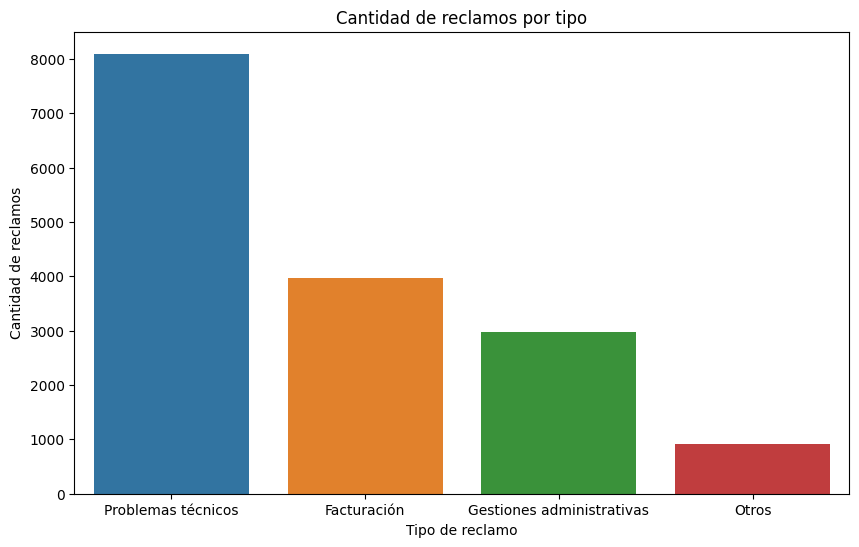

In [85]:
graf = reclamos.groupby('Año')[['Problemas técnicos', 'Facturación','Gestiones administrativas','Otros']].sum()

plt.figure(figsize=(10,6))
sns.barplot(graf)
plt.title('Cantidad de reclamos por tipo')
plt.ylabel('Cantidad de reclamos')
plt.xlabel('Tipo de reclamo')
plt.show()

<p>Si bien no nos encontramos analizando áreas de atención al cliente, sabemos que el hecho de que haya problemas en el servicio, influye en la pérdida de clientes. "Es decir, el rendimiento de la calidad tiene un efecto positivo sobre la satisfacción del cliente
(Sandvik y Duhan, 1996).". Fuente: https://core.ac.uk/download/pdf/161254117.pdf</p>
<p>Por lo tanto, en el siguiente KPI vamos a buscar la disminución de reclamos por problemas técnicos para el siguiente mes.</p>

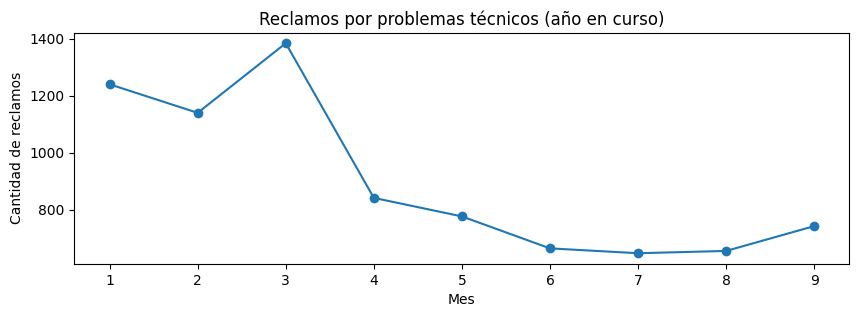

In [90]:
graf2 = reclamos.groupby('Mes')['Problemas técnicos'].sum()

plt.figure(figsize=(10,3))
plt.plot(graf2, marker = 'o')
plt.title('Reclamos por problemas técnicos (año en curso)')
plt.ylabel('Cantidad de reclamos')
plt.xlabel('Mes')

plt.show()

In [98]:
reclamos['Pct_tecn'] = reclamos['Problemas técnicos'].pct_change()*100
reclamos

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual,Pct_tecn
0,2023,1,1240,504,407,105,2256,NaN
1,2023,2,1140,468,393,91,2092,-8.064516
2,2023,3,1384,633,433,168,2618,21.403509
3,2023,4,842,440,294,106,1682,-39.161850
4,2023,5,777,434,293,94,1598,-7.719715
5,2023,6,665,399,320,92,1476,-14.414414
6,2023,7,648,379,291,88,1406,-2.556391
7,2023,8,656,368,288,81,1393,1.234568
8,2023,9,743,341,260,91,1435,13.262195


In [99]:
((720-743)/743)*100

-3.095558546433378

<p>Podemos ver que a partir del mes 8, hubo un incremento en los reclamos. Por lo tanto, el objetivo de nuestro KPI va a ser disminuirlo un 3% entre los meses 9 y 10.</p>
<p>La fórmula a utilizar va a ser: <b>((RTecnicos Mes Actual - RTecnicos Mes Anterior)/(RTecnicos Mes Anterior) * 100</b></p>

<p>Por lo tanto para cumplir nuestro objetivo, esperamos 720 reclamos por Problemas Técnicos para el mes 10.</p>

<p><b>KPI = ((720-743)/743)*100 = -3%</b></p>

In [101]:
reclamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        9 non-null      int64  
 1   Mes                        9 non-null      int64  
 2   Problemas técnicos         9 non-null      int64  
 3   Facturación                9 non-null      int64  
 4   Gestiones administrativas  9 non-null      int64  
 5   Otros                      9 non-null      int64  
 6   Total mensual              9 non-null      int64  
 7   Pct_tecn                   8 non-null      float64
dtypes: float64(1), int64(7)
memory usage: 708.0 bytes


In [100]:
reclamos.to_csv('datasets/02-denuncias-reclamos-2023.csv', sep=',', index='False', encoding='utf-8')

<b>CONEXIÓN A FIBRA ÓPTICA</b>

In [4]:
conexion_fibra = pd.read_csv('datasets/03-conexion-fibra-optica.csv', sep= ';', encoding_errors='ignore')
pd.DataFrame(conexion_fibra)

,Localidad,Departamento,Provincia,Latitud,Longitud,Estado
0,1 de Mayo,Cainguas,Misiones,"-27,16917","-55,027087",Conectado
1,2 de Mayo _Nucleo 1,Cainguas,Misiones,"-27,021666","-54,687641",Conectado
2,2 de Mayo _Nucleo 2,Cainguas,Misiones,"-27,02955696","-54,6641209",Conectado
3,2 de Mayo _Nucleo 3,Cainguas,Misiones,"-27,01233333","-54,60730556",Conectado
4,20 de Septiembre,Nogoya,Entre Rios,"-32,3907222","-59,6615",Conectado
...,...,...,...,...,...,...
1113,Yerba Buena Tucuman cambia por San Pablo Catam...,Yerba Buena,Tucuman,"-26,811678","-65,265672",Conectado
1114,Yuto,Ledesma,Jujuy,"-23,64161111","-64,47055",Conectado
1115,Zapala,Zapala,Neuquen,"-38,89735","-70,066825",Conectado
1116,Zarate,Zarate,Buenos Aires,"-34,105194","-59,048278",Conectado


In [6]:
conexion_fibra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Localidad     1118 non-null   object
 1   Departamento  1114 non-null   object
 2   Provincia     1118 non-null   object
 3   Latitud       1117 non-null   object
 4   Longitud      1117 non-null   object
 5   Estado        1118 non-null   object
dtypes: object(6)
memory usage: 52.5+ KB


In [8]:
columnas = ['Localidad', 'Departamento', 'Latitud', 'Longitud']
conexion_fibra = conexion_fibra.drop(columns = columnas)

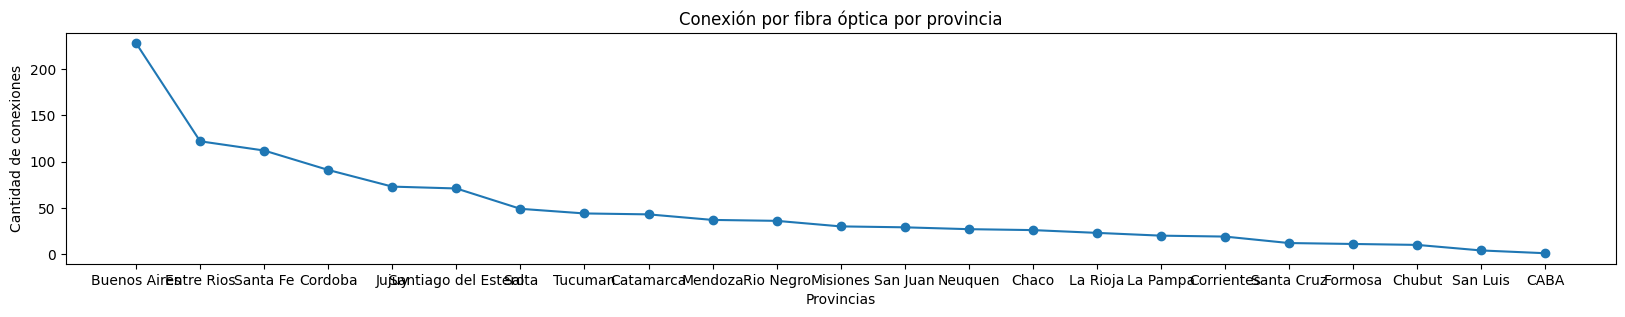

In [27]:
graf3 = conexion_fibra.groupby('Provincia')['Estado'].count().sort_values(ascending=False)
plt.figure(figsize=(20,3))
plt.plot(graf3, marker='o')
plt.title('Conexión por fibra óptica por provincia')
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Provincias')

plt.show()